In [25]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [40]:
%autoreload 2

import datetime

import pandas as pd
import matplotlib.pyplot as plt

from world_rowing import api, livetracker

In [43]:
most_recent = api.get_most_recent_competition()
most_recent

competitionTypeId    765733fd-a689-4ee8-9bbe-12c32e7d307e
venueId              77d8de2b-7bc2-4b2f-8d58-437442a82cc4
CompetitionCode                               WCp2_2021_1
DisplayName                      2021 World Rowing Cup II
Year                                                 2021
StartDate                             2021-05-21 00:00:00
EndDate                               2021-05-23 00:00:00
EntryDeadlineDate                                    None
IsFisa                                                  1
HasResults                                            1.0
Name: 5dd7837a-7776-4038-a3fc-0ffa2ee57b39, dtype: object

In [45]:
races = api.get_competition_races(most_recent.name)
race = races.loc[
    races.DisplayName.str.contains("Lightweight Women's Double")
].iloc[-1]
race

eventId                 f5e748d9-0dfd-412f-818b-6788110a5a40
racePhaseId             e0fc3320-cd66-43af-a5b5-97afd55b2971
raceStatusId            182f6f15-8e78-41c3-95b3-8b006af2c6a1
genderId                dae73748-90c9-4a49-9d94-4d4810fa457e
RscCode                   ROWWSCULL2-L----------FNL-000100--
DisplayName        Lightweight Women's Double Sculls Final A
RaceNr                                                    89
IsStarted                                               None
Date                                     2021-05-23 09:12:00
DateString                         2021-05-23 11:12:00+02:00
Progression                                                 
Rescheduled                                              NaN
RescheduledFrom                                         None
Name: db43c8f0-ac8b-4d7c-954f-69a1183bb665, dtype: object

In [48]:
live_data = livetracker.get_race_livetracker(race.name)

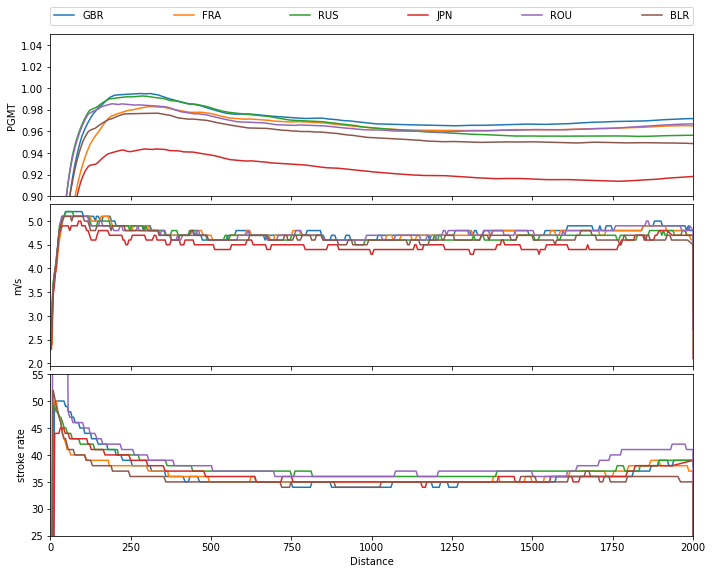

In [49]:
f, axes, lines = livetracker.plot_livedata(live_data)
axes[0].set_ylim(0.9, 1.05)

f.tight_layout()
f.subplots_adjust(hspace=0.05)

In [50]:
def update_lines(lines, live_data):
    countries = live_data.time.columns
    for i, c in enumerate(live_data.time.columns):
        lines[0][i].set_data(
            live_data.distanceTravelled[c], 
            live_data.PGMT[c], 
        )
        lines[1][i].set_data(
            live_data.distanceTravelled[c], 
            live_data.metrePerSecond[c], 
        )
        lines[2][i].set_data(
            live_data.distanceTravelled[c], 
            live_data.strokeRate[c],
        )
        
    return sum(lines, [])
    
def animate(i):
    return update_lines(lines, live_data.loc[:i])

In [51]:
from matplotlib import animation
from IPython.display import HTML, display, clear_output
import time

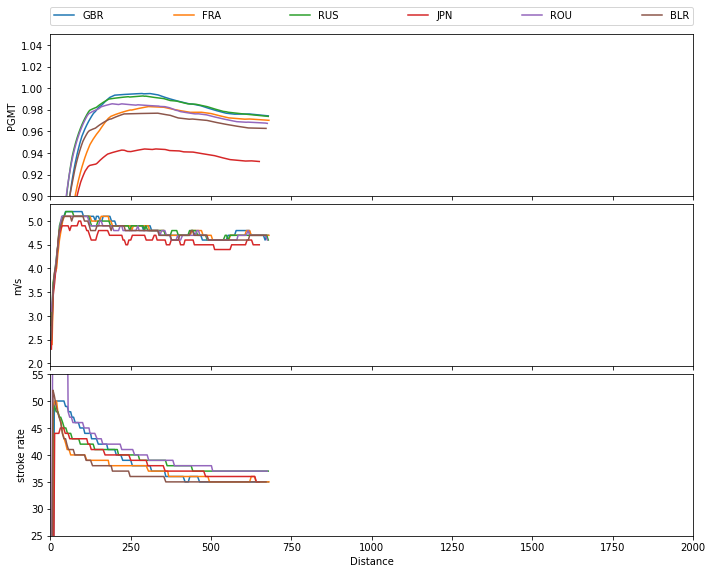

In [52]:
# %%matplotlib inline

i = 0
while True:
    try:
        animate(i)
        display(f)
        clear_output(wait=True)
#         time.sleep(0.1)
        i = (i + 1) % len(live_data)
    except KeyboardInterrupt:
        break

In [15]:
i = (i + 1) % len(live_data)
i

2

In [9]:
# anim = animation.FuncAnimation(
#     f, animate, 
#     frames=400, 
#     interval=20,
#     blit=True
# )
# anim

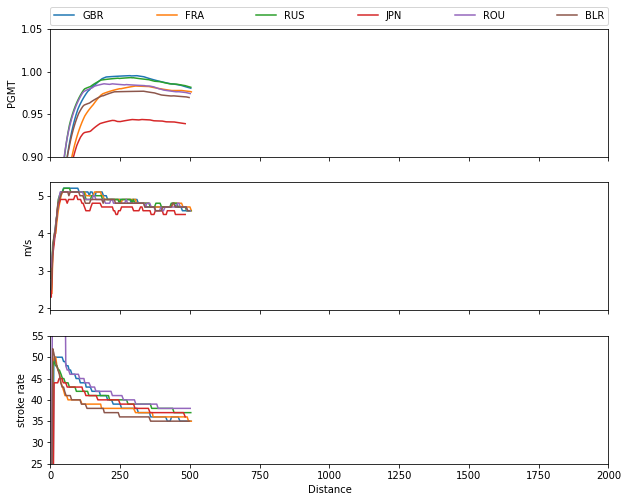

In [10]:
update_lines(lines, live_data.loc[:100])
f

In [11]:
line = lines[0][0]

In [12]:
line.set_data?

In [13]:
lines[0][0].set_data

<bound method Line2D.set_data of <matplotlib.lines.Line2D object at 0x7fd7814d8100>>